**Introduction to Artificial Neural Networks with Keras**

This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [17]:
y = np.array([1,2,3])
y1 = np.exp(3*y) # 2.3**y
y1/sum(y1)

array([0.00235563, 0.04731416, 0.95033021])

In [15]:
np.exp(4), 2.72**4

(54.598150033144236, 54.73632256000002)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [4]:
# Import the libraries
import numpy as np
from sklearn.datasets import load_iris # contains the Iris dataset
from sklearn.linear_model import Perceptron # Perceptron

In [5]:
# Import the Iris dataset
iris = load_iris() # load dataset
X = iris.data[:, (2, 3)]  # consider only the petal length, petal width
y = (iris.target == 0).astype(np.int) # predicting only Iris-setosa

In [6]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# Training the Perceptron on the Iris dataset
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # creating model
per_clf.fit(X, y) # training model

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# Predicting using our model
y_pred = per_clf.predict([[2, 0.5]])

In [10]:
y_pred

array([1])

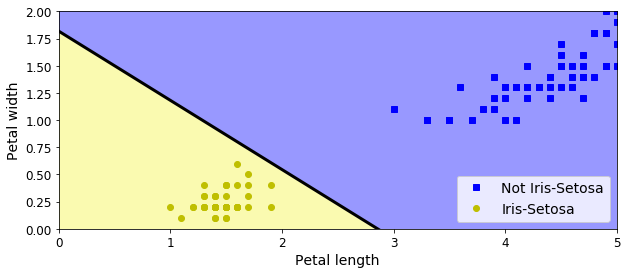

In [11]:
# Plotting prediction of Iris-Setosa vs Not Iris-Setosa

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# meshgrid function is used to create a rectangular grid out of two given
# one-dimensional arrays representing the Cartesian indexing or Matrix indexing

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# ravel returns contiguous flattened array
# (1D array with all the input-array elements and with the same type as it)

X_new = np.c_[x0.ravel(), x1.ravel()] # Translates slice objects to concatenation along the second axis.
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

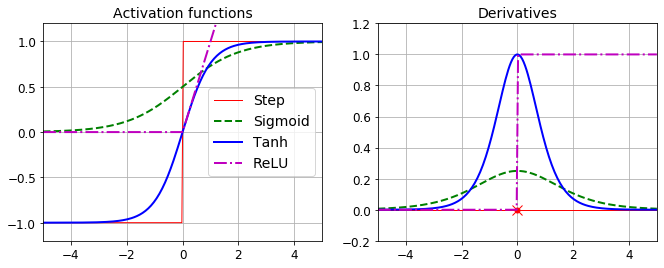

In [11]:
# plotting the Activation functions and their derivatives

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# first plot

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# second plot

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [12]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    a = activation(x1 + x2 - 1.5)
    b = activation(x1 + x2 - 0.5)
    return activation(-a + b - 0.5)

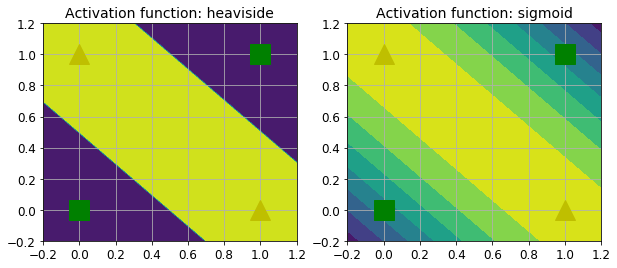

In [13]:
# plotting the Heaviside and Sigmoid function

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

# first plot

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

# second plot

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [14]:
import numpy as np
a = np.exp([0.4, 0.3])
a/np.sum(a)

array([0.52497919, 0.47502081])

In [ ]:
y = np.array

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.6.0'

In [6]:
keras.__version__

'2.6.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:


For more infor: https://github.com/zalandoresearch/fashion-mnist

In [7]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [8]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [109]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [111]:
y_train[0]

4

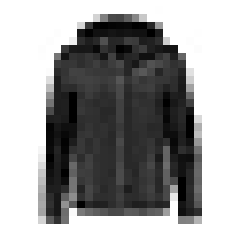

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [25]:
a = np.array([1,2,3])

In [26]:
b = a[1:2]

In [27]:
a

array([1, 2, 3])

In [28]:
b[0] = 20

In [29]:
a

array([ 1, 20,  3])

In [30]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [32]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [33]:
X_valid.shape

(5000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

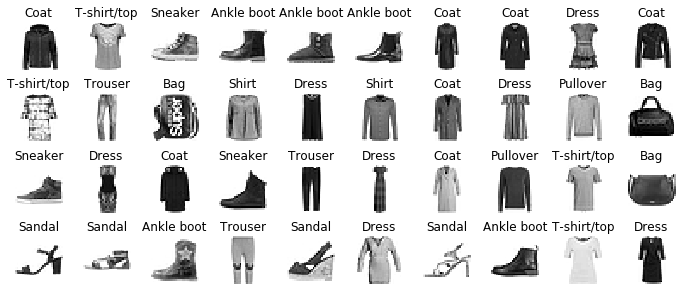

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

In [19]:
def softmax(arr):
    pos = np.exp(arr)
    return pos/np.sum(pos)

In [20]:
softmax([50,0.5,-12])

array([1.00000000e+00, 3.17997090e-22, 1.18506486e-27])

**Why do we need clear_session?**

It is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. EVentually models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [39]:
np.log(10)

2.302585092994046

In [40]:
from numpy import log10
def my_cross_entropy(actual, predicted):
    return -np.dot(actual, log10(predicted))

def binary_cross_entropy(actual, predicted):
    return my_cross_entropy([actual, 1-actual], [predicted, 1-predicted])

In [41]:
binary_cross_entropy(0.01, 0.99)

1.980043648054024

In [42]:
binary_cross_entropy(0.01, 0.01)

0.024321157348425586

In [43]:
binary_cross_entropy(0.02, 0.01)

0.044277509294401086

In [44]:
binary_cross_entropy(0.9, 0.9)

0.14118174150460758

In [45]:
binary_cross_entropy(0.9, 0.1)

0.9045757490560675

In [46]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [78]:
# Better way of doing it

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [73]:
# Better way of doing it

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [57]:
model.layers # viewing the layers

In [24]:
785*300

235500

In [26]:
model.summary() # viewing the summary of the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


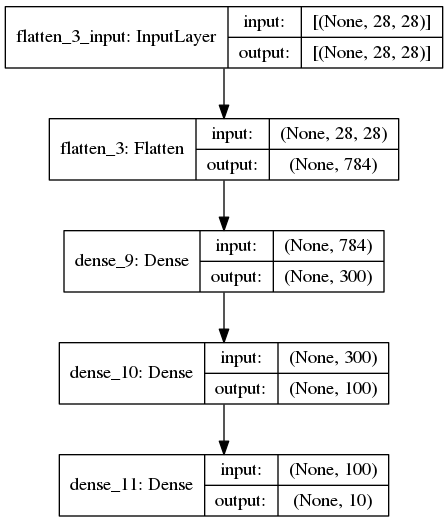

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
hidden1 = model.layers[1] # first layer
hidden1.name

'dense_9'

In [30]:
model.get_layer(hidden1.name) is hidden1 # checking if the layer is hidden

True

In [32]:
weights, biases = hidden1.get_weights() # getting the weights and biases

In [33]:
weights # checking the weights

array([[ 0.07368587, -0.03158443,  0.07245855, ..., -0.04060331,
        -0.05746939,  0.05343366],
       [-0.04785441, -0.02080581, -0.00573315, ...,  0.02447896,
         0.04943242, -0.04283349],
       [-0.04391675, -0.05972073, -0.06588375, ...,  0.01406652,
         0.05873813, -0.02120901],
       ...,
       [ 0.0111417 ,  0.03766344,  0.04026911, ...,  0.02438634,
         0.05204217, -0.01635746],
       [-0.05569723,  0.0465396 , -0.00463293, ...,  0.04842943,
         0.05849531, -0.04709498],
       [ 0.07356842, -0.01204146,  0.04683723, ..., -0.02917809,
        -0.04941867,  0.05423827]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases # checking the biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [41]:
res = tf.keras.utils.to_categorical([0, 1, 2, 3, 4,5,6,7,8,9])

In [42]:
res

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [60]:
np.argmax(res, axis=1)

array([1, 2, 0, 4])

In [44]:
y_train[0]

4

In [79]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
# Compiling the model we created

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [59]:
X_train.shape

(55000, 28, 28)

In [62]:
55000/32

1718.75

In [80]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # fitting the model to training data

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9812 - accuracy: 0.6541 - val_loss: 0.6055 - val_accuracy: 0.7922
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5637 - accuracy: 0.7998 - val_loss: 0.5098 - val_accuracy: 0.8240
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4984 - accuracy: 0.8235 - val_loss: 0.4848 - val_accuracy: 0.8306
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4543 - accuracy: 0.8399 - val_loss: 0.4369 - val_accuracy: 0.8502
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4259 - accuracy: 0.8491 - val_loss: 0.4401 - val_accuracy: 0.8434
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4048 - accuracy: 0.8568 - val_loss: 0.3894 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3856 - accuracy: 0.8624 - val_loss: 0.3972 - val_accuracy:

In [63]:
history.params # getting the param history

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [76]:
print(history.epoch) # epoch history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [45]:
history.history.keys() # printing the history keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

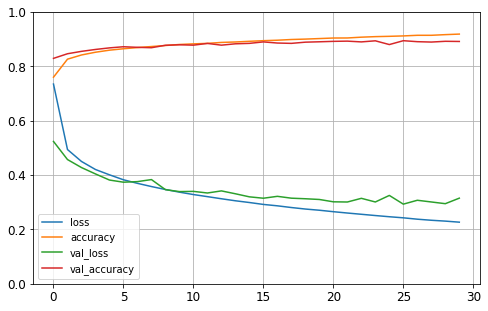

In [77]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [82]:
model.evaluate(X_test, y_test) # Evaluating the model

313/313 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8732


[0.3627189099788666, 0.873199999332428]

In [83]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
# predicting first 3 elements

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

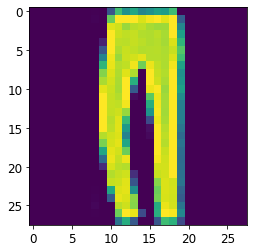

In [88]:
plt.imshow(X_new[2])

In [70]:
np.argmax(y_proba.round(2), axis=1)

array([9, 2, 1])

In [81]:
# predicting the class of these 3 elements

y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [72]:
np.array(class_names)[y_pred] # getting the class names of the predicted elements

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [73]:
y_new = y_test[:3] # evaluating the prediction by matching with y_test
y_new

array([9, 2, 1], dtype=uint8)

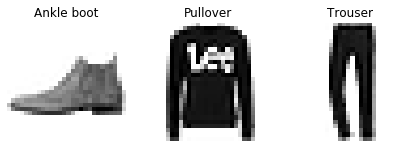

In [74]:
# Plotting the predicted elements

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset

In [89]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing() # loading the California Housing dataset

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # test and train
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) # training and validation

# Using the StandardScaler to scale the dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [90]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [91]:
np.random.seed(42) # generating random see
tf.random.set_seed(42) # setting random seed

In [92]:
X_train.shape

(11610, 8)

In [93]:
# Creating the model using the Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3)) # compiling the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) # fit the model


/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

In [94]:

mse_test = model.evaluate(X_test, y_test) # evaluating
X_new = X_test[:3]
y_pred = model.predict(X_new) # predicting

162/162 [==============================] - 0s 909us/step - loss: 0.4212


In [83]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if any).

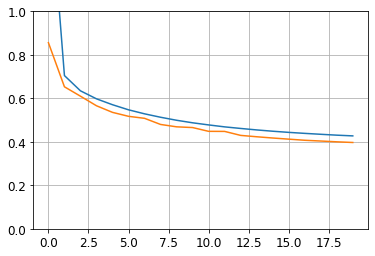

In [95]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting y-axis limit
plt.show()

In [82]:
y_pred # printing the predictions

array([[0.37310064],
       [1.6790789 ],
       [3.0817137 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [96]:
import tensorflow as tf
from tensorflow import keras

In [97]:
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
X_train.shape[1:]

(8,)

In [99]:
l = keras.layers.Dense(30, activation="relu")

In [103]:
import math
def power_creator(power):
    def f1(y):
        return math.pow(y, power)
    return f1

In [107]:
my_cube_func = power_creator(3)

In [106]:
my_cube_func(20)

8000.0

In [108]:
mysq = power_creator(2)

In [109]:
mysq(30)

900.0

In [110]:
power_creator(4)(2)

16.0

In [23]:
a = np.array([1,1])

In [24]:
b = np.array([2,2])

In [25]:
np.concatenate([a, b])

array([1, 1, 2, 2])

In [26]:
keras.layers.concatenate([a, b])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 2, 2])>

In [114]:
# Defining the layers

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) # concatenate inputs
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [115]:
model.summary() # generating model summary

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 30)           930         dense_32[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_33[0][0]             

In [116]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) # fit model
mse_test = model.evaluate(X_test, y_test) # evaluate model


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - val_loss: 0.8798
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - val_loss: 0.6420
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6265 - val_loss: 0.5891
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - val_loss: 0.5455
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5566 - val_loss: 0.5409
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5312 - val_loss: 0.4903
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - val_loss: 0.4728
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4952 - val_loss: 0.5017
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4802 - val_loss: 0.4511
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4685 - val_loss: 0.4330

In [117]:
y_pred = model.predict(X_test) # predict using the model

In [61]:
y_pred

array([[0.72058403],
       [1.7938155 ],
       [3.5020304 ],
       ...,
       [1.4675169 ],
       [2.0734572 ],
       [3.982666  ]], dtype=float32)

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
# creating the model using different number of layers

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate inputs
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [119]:
X_train.shape

(11610, 8)

In [49]:
[1,2,3,4][2:]

[3, 4]

In [37]:
X_train.shape

(11610, 8)

In [38]:
X_train_A.shape, X_train_B.shape

((11610, 5), (11610, 6))

In [120]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1094 - val_loss: 1.0289
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7849 - val_loss: 0.6881
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6517 - val_loss: 0.6039
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5965 - val_loss: 0.5446
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5595 - val_loss: 0.5129
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.4873
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4673
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 0.4499
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4748 - val_loss: 0.4373
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4641 - val_loss: 0.4269

Adding an auxiliary output for regularization:

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # concatenate the inputs
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # aux output for regularization
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [53]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model

In [68]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) # fit the model

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 105us/sample - loss: 2.1346 - main_output_loss: 1.9194 - aux_output_loss: 4.0632 - val_loss: 2.9120 - val_main_output_loss: 2.2555 - val_aux_output_loss: 8.8088
Epoch 2/20
11610/11610 [==============================] - 1s 61us/sample - loss: 0.8954 - main_output_loss: 0.7048 - aux_output_loss: 2.6119 - val_loss: 1.4135 - val_main_output_loss: 0.6348 - val_aux_output_loss: 8.4172
Epoch 3/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7400 - main_output_loss: 0.6077 - aux_output_loss: 1.9305 - val_loss: 1.3594 - val_main_output_loss: 0.5885 - val_aux_output_loss: 8.2925
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6749 - main_output_loss: 0.5690 - aux_output_loss: 1.6264 - val_loss: 1.2789 - val_main_output_loss: 0.5611 - val_aux_output_loss: 7.7340
Epoch 5/20
11610/11610 [==============================] - 1s 63us/

In [74]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B]) # predicting using aux layer

5160/5160 [==============================] - 0s 41us/sample - loss: 5.7750 - main_output_loss: 5.6577 - aux_output_loss: 7.0143


# The subclassing API

In [2]:
from tensorflow import keras

In [44]:
# Creating the WideAndDeepModel using subclassing

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        print("Initializing")
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        print("Called call")
        input_A, input_B = inputs
        h1 = self.hidden1(input_B)
        h2 = self.hidden2(h1)
        concat = keras.layers.concatenate([input_A, h2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(h2)
        return main_output, aux_output

In [45]:
model = WideAndDeepModel(30, activation="relu")

Initializing


In [46]:
'''
Model.fit((X1, X2), (Y1, Y2))
1. For every epoch:
    1. Forward Pass: Model(X1, X2)-> call(), compute the loss
        - go layer by layer in model (Right to left)...
            - compute the gradients of weights - model.call()
            - compute the new values
        - update all the weights
'''

'\nModel.fit((X1, X2), (Y1, Y2))\n1. For every epoch:\n    1. Forward Pass: Model(X1, X2)-> call(), compute the loss\n        - go layer by layer in model (Right to left)...\n            - compute the gradients of weights - model.call()\n            - compute the new values\n        - update all the weights\n'

In [47]:
# gradients_w = (model(w+delta, X) - model(w, X))/delta

In [48]:
model.compile(loss=("mse", "mse"), loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [49]:
# # A list of file to compress.
# files = [file1, file2, file3....]

# def comp(file):
#     return compressed_file

# map(comp, files) # Apache spark or python...


In [52]:
model.compile?

In [53]:
model.fit?

In [57]:
dir(keras.callbacks)

['BaseLogger',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'EarlyStopping',
 'History',
 'LambdaCallback',
 'LearningRateScheduler',
 'ModelCheckpoint',
 'ProgbarLogger',
 'ReduceLROnPlateau',
 'RemoteMonitor',
 'TensorBoard',
 'TerminateOnNaN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

In [50]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))


Epoch 1/10
Called call
Called call
363/363 [==============================] - 2s 3ms/step - loss: 2.9951 - output_1_loss: 2.7618 - output_2_loss: 5.0951 - val_loss: 2.7250 - val_output_1_loss: 1.0989 - val_output_2_loss: 17.3598
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1837 - output_1_loss: 0.8982 - output_2_loss: 3.7535 - val_loss: 2.5461 - val_output_1_loss: 0.7871 - val_output_2_loss: 18.3770
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9203 - output_1_loss: 0.7131 - output_2_loss: 2.7850 - val_loss: 2.3741 - val_output_1_loss: 0.6856 - val_output_2_loss: 17.5701
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8067 - output_1_loss: 0.6444 - output_2_loss: 2.2679 - val_loss: 2.1250 - val_output_1_loss: 0.6245 - val_output_2_loss: 15.6295
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7404 - output_1_loss: 0.6031 - output_2_loss: 1.9763 - val_loss: 1.8501 - val_ou

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [56]:
model = WideAndDeepModel(30, activation="relu") # creating an instance of the WideAndDeepModel

# Saving and Restoring

In [60]:
import numpy as np

In [62]:
import tensorflow as tf

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
# creating a model to demonstrate saving and restoring

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # fit the model
mse_test = model.evaluate(X_test, y_test) # evalutate the model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [66]:
model.save("my_keras_model_oct19.h5") # Saving the model

In [68]:
!ls my_keras_model_oct19*

my_keras_model_oct19.h5


In [69]:
!file my_keras_model_oct19*

my_keras_model_oct19.h5: Hierarchical Data Format (version 5) data


In [67]:
!strings my_keras_model_oct19.h5

TREE
HEAP
model_weights
optimizer_weights
keras_version
backend
model_config
training_config
TREE
HEAP
dense_47
dense_48
dense_49
layer_names
GCOL
2.6.0
tensorflow
{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 8], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_47_input"}}, {"class_name": "Dense", "config": {"name": "dense_47", "trainable": true, "batch_input_shape": [null, 8], "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_48", "trainable": true, "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "ke

In [62]:
model1 = keras.models.load_model("my_keras_model.h5") # Loading the model

In [63]:
model.predict(X_new) # predicting using the model

array([[0.551559 ],
       [1.6555369],
       [3.0014234]], dtype=float32)

In [64]:
model.save_weights("my_keras_weights.ckpt") # saving the weights

In [65]:
model.load_weights("my_keras_weights.ckpt") # loading the saved weights

# Using Callbacks during Training

In [72]:
# Clearing previous session and
# generating random seed and setting
# the random seed

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
# Defining the model to demostrate callbacks

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # saving the best model checkpoint

if file.exists("my_keras_model.h5"):
    model = keras.models.load_model("my_keras_model.h5") # rollback to best model
    
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb]) # using the callback

mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [69]:
!ls my_keras_model.h5

my_keras_model.h5


In [ ]:
55 -> 60
.01, .02, .03, .04, .04
the best was 55
it will revert the weights to 55th


In [89]:
cb = keras.callbacks.Callback?

In [ ]:
cb = keras.callbacks.Callback

In [ ]:
cb = keras.callbacks.Callback

In [101]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, x):
        print("================== BEGING ==============")
    def on_train_end(self, logs=None):
        global training_finished
        training_finished = True
        print("================== THIS IS THE END ==============")
    def on_epoch_end(self, epoch, epoch_logs):
        print(f"GIRI: You are at {epoch}")

In [102]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True) # saving early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) # saving the best model checkpoint
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, MyCallback()]) # using the callback for checkpoint, and early stopping
mse_test = model.evaluate(X_test, y_test)

================== BEGING ==============
Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.3508
GIRI: You are at 0
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3489 - val_loss: 0.3637
GIRI: You are at 1
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3464
GIRI: You are at 2
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3479 - val_loss: 0.3338
GIRI: You are at 3
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3392
GIRI: You are at 4
================== THIS IS THE END ==============
162/162 [==============================] - 0s 1ms/step - loss: 0.3462


In [100]:
!ls -la my_keras_model.h5

-rw-r--r-- 1 sandeepgiri9034 sandeepgiri9034 23408 Oct 19 04:42 my_keras_model.h5


In [79]:
mse_test = model.evaluate(X_valid, y_valid)

3870/3870 [==============================] - 0s 28us/sample - loss: 0.3224


In [103]:
# Creating custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\n SG :: val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [104]:
val_train_ratio_cb = PrintValTrainRatioCallback() # calling the custom callback
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb]) # fitting the model using the custom callback

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3465 - val_loss: 0.3489

 SG :: val/train: 1.01
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3630

 SG :: val/train: 1.05
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3455 - val_loss: 0.3440

 SG :: val/train: 1.00
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3451 - val_loss: 0.3311

 SG :: val/train: 0.96
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3444 - val_loss: 0.3378

 SG :: val/train: 0.98


In [89]:
# SG - Idempotent code
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

path = "my_keras_model.h5"
ck_file = "my_keras_model_ch_pt.h5"
if os.path.exists(path):
    model = keras.models.load_model(path) # Loading the model
    if os.path.exists(ck_file):
        model.load_weights(ck_file) # loading the saved weights
else:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compile the model
    model.save("my_keras_model.h5") # Saving the model

checkpoint_cb = keras.callbacks.ModelCheckpoint(ck_file, save_best_only=True) # saving the best model checkpoint
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # saving early stopping

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # using the callback for checkpoint, and early stopping

mse_test = model.evaluate(X_test, y_test)



Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3283 - val_loss: 0.3610
Epoch 2/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3283 - val_loss: 0.3234
Epoch 3/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3277 - val_loss: 0.3588
Epoch 4/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3277 - val_loss: 0.3136
Epoch 5/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3271 - val_loss: 0.3576
Epoch 6/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3271 - val_loss: 0.3270
Epoch 7/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3267 - val_loss: 0.3154
Epoch 8/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3264 - val_loss: 0.3161
Epoch 9/100
5160/5160 [==============================] - 0s 27us/sample - loss: 0.3289


# TensorBoard

In [116]:
#root_logdir = os.curdir + "/my_logs"
import os
root_logdir = os.path.join(os.curdir, "my_logs") # defining root log directory

In [117]:
# generate a subdirectory path based on the current date
# and time so that it’s different at every run

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_10_19-04_53_11'

In [118]:
!ls my_logs/run_2024_10_19-04_49_04/train

events.out.tfevents.1729313394.cxln4.16608.0.v2     plugins
events.out.tfevents.1729313394.cxln4.profile-empty


In [119]:
!pwd

/home/sandeepgiri9034/PG-Certificate-Course-in-AI-Machine-Learning-and-Data-Science-Batch-1-2024-


In [120]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
# defining the model to demostrate Tensorboard functionality

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # compiling the model

In [123]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) # Using Tensorboard callback
history = model.fit(X_train, y_train, epochs=300,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.3525
Epoch 2/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3714 - val_loss: 0.3572
Epoch 3/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.3500
Epoch 4/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3685 - val_loss: 0.3481
Epoch 5/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3671 - val_loss: 0.3531
Epoch 6/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3532
Epoch 7/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3646 - val_loss: 0.3489
Epoch 8/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3480
Epoch 9/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - val_loss: 0.3563
Epoch 10/300
363/363 [==============================] - 1s 2ms/step - loss: 0.3612 - val_lo

KeyboardInterrupt: 

To start the TensorBoard server, open a terminal and type below command in terminal

```bash
/usr/local/anaconda/envs/tensorflow2/bin/tensorboard --logdir=./my_logs --port=4049 --bind_all
```

If you are getting error that port is already in use, then please use any other port in the range of 4040 to 4140. Once TensorBoard server is started then please go to below url to access it

http://your_web_console:your_port_number

Replace *your_web_console* with your CloudxLab web console address. Say your console is on f.cloudxlab.com then *your_web_console* will be f.cloudxlab.com. *your_port_number* will be the port on which your TensorBoard server is running. Below is the fully qualified url for accessing your TensorBoard server

http://f.cloudxlab.com:4049


Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

In [130]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_07_19-15_43_31'

In [131]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [132]:
# running another model to compare

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [133]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2) # calling the Tensorboard using the second model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 97us/sample - loss: 5.6341 - val_loss: 1.3205
Epoch 2/30
11610/11610 [==============================] - 1s 67us/sample - loss: 1.2704 - val_loss: 1.0757
Epoch 3/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.9370 - val_loss: 0.7769
Epoch 4/30
11610/11610 [==============================] - 1s 68us/sample - loss: 0.8854 - val_loss: 0.8254
Epoch 5/30
11610/11610 [==============================] - 1s 66us/sample - loss: 0.9501 - val_loss: 0.9415
Epoch 6/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.8283 - val_loss: 0.6111
Epoch 7/30
11610/11610 [==============================] - 1s 66us/sample - loss: 0.8095 - val_loss: 0.7394
Epoch 8/30
11610/11610 [==============================] - 1s 67us/sample - loss: 1.1857 - val_loss: 1.0356
Epoch 9/30
11610/11610 [==============================] - 1s 66us/sample - loss: 0.8920 - val_l

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [96]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.

